In [2]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

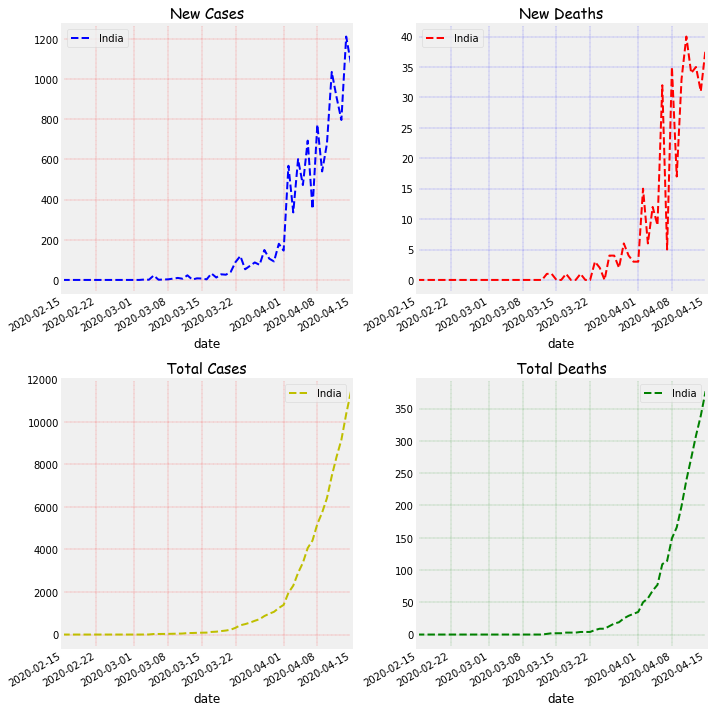

In [53]:
data = pd.read_csv('full_data.csv')
data['date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in data['date']] 

countries=['India']
data_country = data[data.location.isin(countries)]  
data_country.set_index('date', inplace=True)  
data_country = data_country.loc['2020-02-15':'2020-04-15'] 
data_country['death_rate'] = data_country['total_deaths']/data_country['total_cases']
#print(data_country.tail())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

data_country.groupby('location')['new_cases'].plot(ax=axes[0,0],linewidth=2 ,linestyle='--',markersize=10, legend=True,color='b')
data_country.groupby('location')['new_deaths'].plot(ax=axes[0,1],linewidth=2 ,linestyle='--',markersize=10, legend=True,color='r')
data_country.groupby('location')['total_cases'].plot(ax=axes[1,0],linewidth=2,linestyle='--',markersize=10, legend=True,color='y')
data_country.groupby('location')['total_deaths'].plot(ax=axes[1,1],linewidth=2 ,linestyle='--',markersize=10, legend=True,color='g')


axes[0, 0].set_title("New Cases",fontdict={'fontname':'Comic Sans MS','fontsize':15})
axes[0, 0].grid(color='r',ls='--',lw=0.25)
axes[0, 1].set_title("New Deaths",fontdict={'fontname':'Comic Sans MS','fontsize':15})
axes[0, 1].grid(color='b',ls='--',lw=0.25)
axes[1, 0].set_title("Total Cases",fontdict={'fontname':'Comic Sans MS','fontsize':15})
axes[1, 0].grid(color='r',ls='--',lw=0.25)
axes[1, 1].set_title("Total Deaths",fontdict={'fontname':'Comic Sans MS','fontsize':15})
axes[1, 1].grid(color='g',ls='--',lw=0.25)


fig.tight_layout()

In [4]:
import seaborn as sns

In [7]:
import scipy
import numpy as np
import seaborn as sns


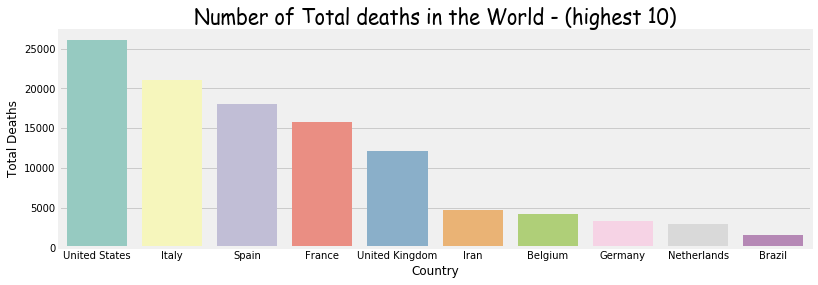

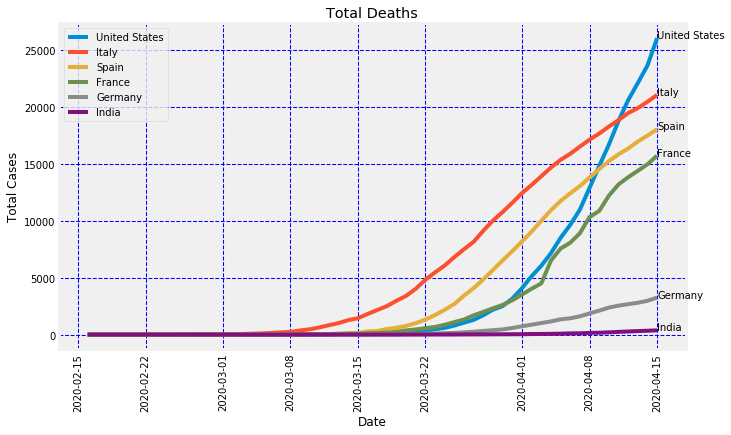

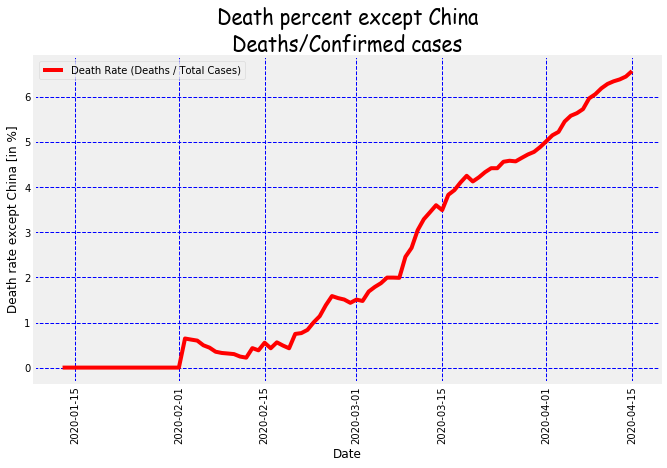

In [54]:
data.columns = ['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases', 'Total Deaths' ]
data_no_china = data.loc[~(data['Country'].isin(["China", "World"]))]
data_no_china = pd.DataFrame(data_no_china.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()
data_no_china = data_no_china.sort_values(by = ['Country','Date'], ascending=False)

def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(3*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:10], df[value][0:10], palette='Set3')
    g.set_title("Number of {} - (highest 10)".format(title),fontdict={'fontname':'Comic Sans MS','fontsize':20})
    plt.show()    
filtered_data_no_china = data_no_china.drop_duplicates(subset = ['Country'], keep='first')
#plot_bar('Country', 'Total Cases', 'Total cases in the World', filtered_data_no_china, size=4)
plot_bar('Country', 'Total Deaths', 'Total deaths in the World', filtered_data_no_china, size=4)
 
def plot_aggregate_countries(df, countries, case_type='Total Cases', size=2, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(10, 6))
    for country in countries:
        df_ = df[(df['Country']==country) & (df['Date'] > '2020-02-15')] 
        g = sns.lineplot(x="Date", y=case_type, data=df_,  label=country)  
        ax.text(max(df_['Date']), max(df_[case_type]), str(country))
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.title('Total Deaths')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='blue', linestyle='dashed', linewidth=1.05)
    plt.show()  

data_no_china_aggregate = data_no_china.groupby(['Date']).sum().reset_index()
#print(data_no_china_aggregate)

data_country_aggregate = data_no_china.groupby(['Country', 'Date']).sum().reset_index()
countries = ["United States", "Italy", "Spain", "France", "Germany", "India"]
plot_aggregate_countries(data_country_aggregate, countries, case_type = 'Total Deaths', size=3)

def plot_mortality(df, title='Mainland China', size=1):
    f, ax = plt.subplots(1,1, figsize=(10,6))
    g = sns.lineplot(x="Date", y='Mortality (Deaths/Cases)', data=df, color='red', label='Death Rate (Deaths / Total Cases)')
    plt.xlabel('Date')
    plt.ylabel('Death rate except China [in %]')
    plt.xticks(rotation=90)
    plt.title('Death percent except China\nDeaths/Confirmed cases',fontdict={'fontname':'Comic Sans MS','fontsize':20})
    ax.grid(color='blue', linestyle='dashed', linewidth=1)
    plt.show()  

data_no_china_aggregate['Mortality (Deaths/Cases)'] = data_no_china_aggregate['Total Deaths'] / data_no_china_aggregate['Total Cases'] * 100
plot_mortality(data_no_china_aggregate, size = 3)


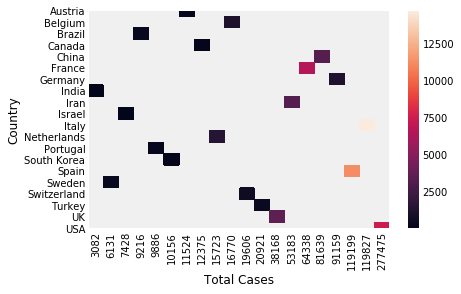

In [55]:
import seaborn as sns
import numpy as np
%matplotlib inline

heat = pd.read_excel('updatedCOVID.xlsx')
heat = heat.pivot('Country','Total Cases','Total Deaths')
display = sns.heatmap(heat)


(y = Ae^(Bx)) A: 0.00022867779162257776, B: 0.17162838652875761

Expected cases for the next 8 days: 
 [495, 588, 698, 829, 984, 1168, 1387, 1647]


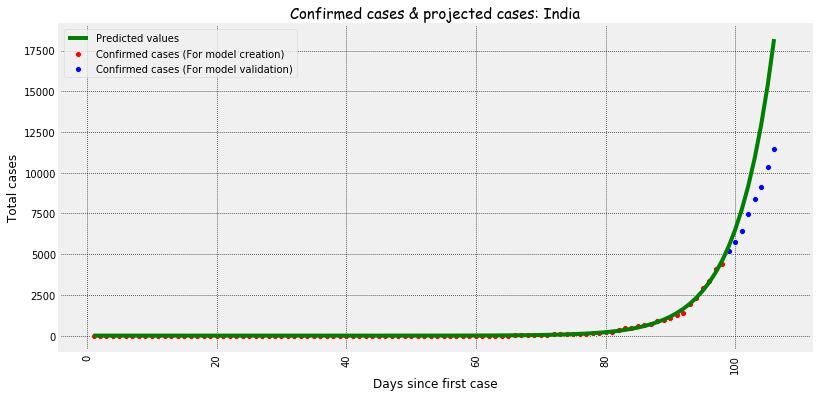

In [56]:
def plot_exponential_fit_data(df, title, delta):
    df = df.sort_values(by=['Date'], ascending=True)
    df['x'] = np.arange(len(df)) + 1  
    df['y'] = df['Total Cases']    
    x = df['x'][:-delta]  
    y = df['y'][:-delta]  
    #print(x,y)
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2)) 
    A, B = c2[0]  
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
    #print(y_fit)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=df['x'][:-delta], y=df['y'][:-delta], label='Confirmed cases (For model creation)', color='red')
    g = sns.scatterplot(x=df['x'][-delta:], y=df['y'][-delta:], label='Confirmed cases (For model validation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green') 
    x_future=range(85,93)  
    y_future=A * np.exp(B * x_future)
    
    list  = [int(round(n,0)) for n in y_future]
    #print(list)
    
    print("Expected cases for the next 8 days: \n",list)
    plt.xlabel('Days since first case')
    plt.ylabel('Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}',fontdict={'fontname':'Comic Sans MS','fontsize':15})
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()
    
data_India = data_no_china[data_no_china['Country']=='India']
df = data_India.copy()
plot_exponential_fit_data(df, 'India', 8)






In [14]:
import random
import math
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [16]:
global_data = pd.read_csv('covid_19_clean_complete.csv')

In [17]:
global_data.drop('Province/State',axis =1,inplace = True)
global_data.rename(columns = {'Country/Region':'Country'},inplace = True)
global_data['Date'] = pd.to_datetime(global_data.Date)

In [18]:
confirmed = global_data.groupby('Date')[['Confirmed']].sum().reset_index()

In [19]:
X = np.array([i for i in range(len(confirmed['Date']))]).reshape(-1, 1)
y = np.array(confirmed['Confirmed']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

In [20]:
x_test_full = np.array([i for i in range(len(confirmed['Date']))]).reshape(-1, 1)
date_df = pd.date_range(start='4/7/2020', end='4/16/2020')
future_from = len(confirmed['Date'])
future_till = len(confirmed['Date'])+10
future_date = np.array([i for i in range(future_from,future_till)]).reshape(-1, 1)

In [21]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(x_train)
poly_X_test_confirmed = poly.fit_transform(x_test)
poly_X_test_confirmed_full = poly.fit_transform(x_test_full)
poly_future_forcast = poly.fit_transform(future_date)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
test_linear_pred_full = linear_model.predict(poly_X_test_confirmed_full)
linear_pred = linear_model.predict(poly_future_forcast)

In [22]:
test_linear_pred = test_linear_pred.astype(int)

linear_pred = linear_pred.astype(int)
linear_pred = pd.DataFrame(linear_pred, columns = ['Predicted']) 
linear_pred['dates'] = date_df



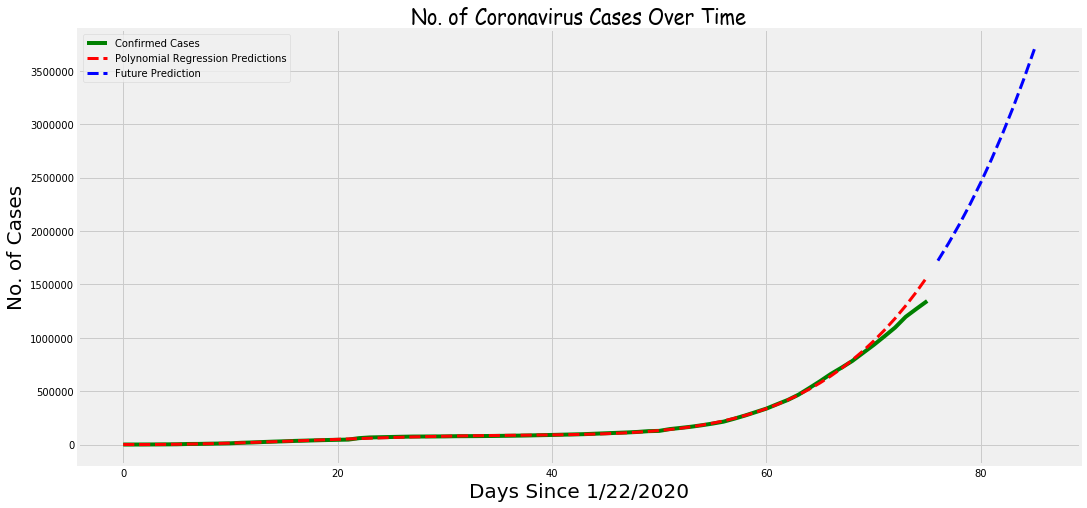

In [57]:
plt.figure(figsize=(16, 8))
plt.plot(y, color='green')
plt.plot(X,test_linear_pred_full, linestyle='dashed',linewidth=3.00, color = 'red')
plt.plot(future_date,linear_pred['Predicted'], linestyle='dashed',linewidth=3.00, color='blue')

plt.title('No. of Coronavirus Cases Over Time', size=20,fontdict={'fontname':'Comic Sans MS','fontsize':15})
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions','Future Prediction'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [58]:
print('Mean Absolute Error:', mean_absolute_error(test_linear_pred, y_test))
R2_score_linear = r2_score(y_test, test_linear_pred, sample_weight=None, multioutput='uniform_average')
print("R-Squared Goodness of Fit = {}".format(R2_score_linear))
prediction =  ( R2_score_linear* 100)
prediction = round(prediction,2)
print("Accuracy:",prediction,"%")

Mean Absolute Error: 62439.666666666664
R-Squared Goodness of Fit = 0.8758065479172177
Accuracy: 87.58 %


In [50]:
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML


In [51]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1849095" data-url="https://flo.uri.sh/visualisation/1849095/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')